# Examples

Below we show a few examples how to use `nbfigtulz`.

Images are stored as PNG and PGF files to disk. The default directory is `img/` (later we change this); so let us first create this directory:

In [1]:
!rm -rf img/ && mkdir img/

We then include `nbfigtulz` as `ftl` and some other libraries...

In [2]:
import nbfigtulz as ftl

import matplotlib.pyplot as plt
import numpy as np

... and create and save our first visualization using `ftl.save_fig`:

### `save_fig`

img/test.png


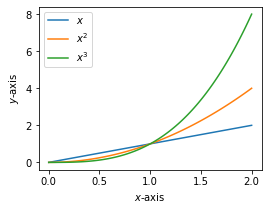

In [3]:
def make_fig(file_name):
    x = np.linspace(0., 2., 100)

    fig, ax = plt.subplots()
    
    ax.plot(x, x, label=r'$x$')
    ax.plot(x, x**2, label=r'$x^2$')
    ax.plot(x, x**3, label=r'$x^3$')
    ax.set_xlabel(r'$x$-axis')
    ax.set_ylabel(r'$y$-axis')
    ax.legend()
    
    return ftl.save_fig(fig, file_name, resize=ftl.fig_size.SMALL)


make_fig('test');

### `with_context`

As you may have noticed we haven't generated a PGF file in our previous example:

In [4]:
!ls img/test.png
!ls img/test.pgf

img/test.png
ls: cannot access 'img/test.pgf': No such file or directory


This is because we didn't use a proper LaTeX backend: We provide the handy `ftl.with_context` annotation to enable such a backend using `lualatex` as the `pgf.texsystem`:

In [5]:
ftl.with_context(make_fig)('test2')

img/test2.png
img/test2.pgf


test2.png

Note also that the image is now **clickable and downloading is straightforward**! Try to close and re-open the notebook and you will see that the image will stay, i.e., no need to re-run the notebook!

More realisitically, `ftl.with_context` is meant to be used as an annotation:

In [6]:
@ftl.with_context
def make_fig():
    ...
    
# equivalent with
make_fig = ftl.with_context(make_fig)

### Changing the image directory

`img/` is the default directory where the images are stored. This can be changed with `ftl.config['img_dir']`:

In [7]:
!rm -rf img2/ && mkdir img2/
ftl.config['img_dir'] = 'img2'

From here on images will be written to `img2/`.

### `img_grid`

For arranging multiple images in a grid we provide the helper function `img_grid`:

In [8]:
@ftl.with_context
def make_fig(p, file_name):
    x = np.linspace(0., 2., 100)

    fig, ax = plt.subplots()
    
    ax.plot(x, x**p)
    ax.set_xlabel(r'$x$-axis')
    ax.set_ylabel(r'$y$-axis')
    ax.set_title(f'$y = x^{p}$')
    
    return ftl.save_fig(fig, file_name, quiet=True)


ftl.img_grid([make_fig(p, f'test{p}') for p in range(3)], n_columns=2, width=600)

The advantage of arranging images in a grid rather than using [`matplotlib.pyplot.subplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) is that each image stays clickable is saved in a separate file.